In [1]:
import sys
sys.path.insert(0, "../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import torch
import torchvision
import glob
import json
from PIL import Image
from tqdm import tqdm

In [3]:
with open("../cfgs/airbus.json") as f:
    cfg=json.load(f)

In [4]:
from seger.dataloaders import MaskDataset
from seger.utils import plot_scatter

In [5]:
data = MaskDataset(cfg, True, cfg["train"]["input_size"])

In [6]:
H, W = list(), list()
for i in tqdm(data.fnames):
    w, h = Image.open(cfg["data"]["data_loc"]+i).size
    H.append(h)
    W.append(w)

100%|██████████| 23256/23256 [00:02<00:00, 9084.16it/s]


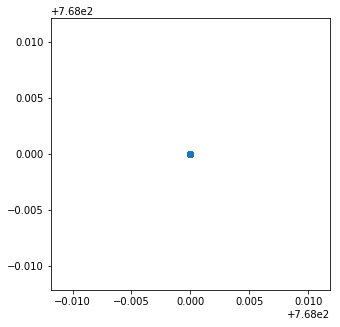

In [7]:
plot_scatter(H, W)

In [11]:
img, mask = data[100]
print(img.shape, mask.shape)

[  0 255]
torch.Size([3, 768, 768]) torch.Size([1, 768, 768])


In [17]:
#torchvision.transforms.ToPILImage()(img)

In [18]:
#torchvision.transforms.ToPILImage()(mask)

In [13]:
from seger.utils import rle_decode

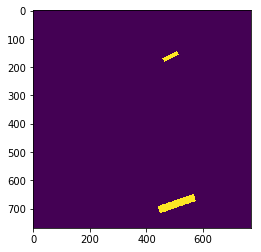

In [15]:
plt.imshow(rle_decode(data.fmask[100], (768, 768)))
plt.show()